In [66]:
# Import calibration functions
# Run this to reimport without having to restart the whole notebook
import radial_velocity_functions
import importlib
importlib.reload(radial_velocity_functions)
from radial_velocity_functions import *

In [67]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.size"] = 10 
matplotlib.rcParams['figure.dpi'] = 150

$$
\sigma^{2}(\hat{\mu})=\frac{1}{\sum 1 / \sigma_{i}^{2}}
$$

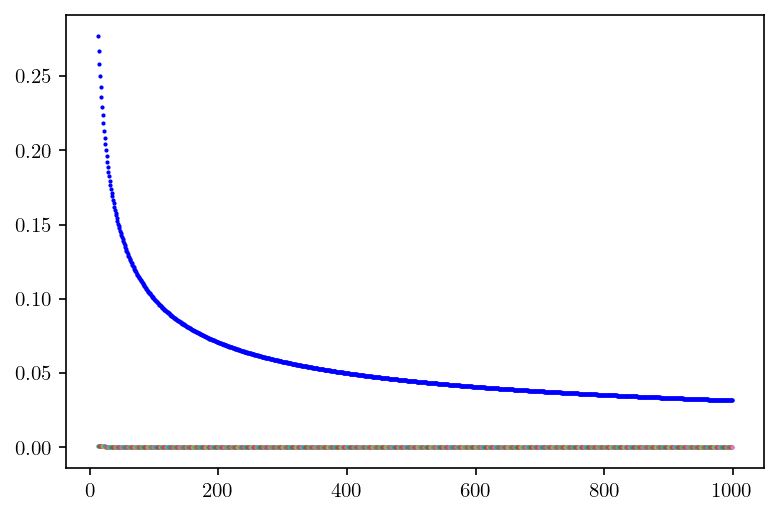

In [70]:
# x = np.asarray([1.25] * 1000)
x = np.random.random(1000)
for n in np.arange(13, 1000):
    xs = x[:n]   
    err = 1/np.sum(1/xs**2)
    # plt.scatter(n, err, s=1)
    # plt.scatter(n, 1/n, s=1, color="orange")
    # plt.scatter(n, 1/n**2, s=1, color="red")
    plt.scatter(n, 1/np.sqrt(n), s=1, color="blue")
    plt.scatter(n, err, s=1)


# x = np.arange(13, 1000)

# plt.plot(x, 1/x**2, color="r")
# plt.plot(x, 1/x, color="g")
# plt.plot(x, 1/np.sqrt(x), color="blue")



In [77]:
# filename = "lily_data_results/all_features_34411_ms_non_bary.npy"
filename = "lily_data_results/34411_all_baryTrue_err1_dist05_area02_chi2.npy"
result, coords = np.load(filename, allow_pickle=True)

# diff_matrix, diff_matrix_err, diff_matrix_valid = parse_matrix_results(result, coords)
# m, final_shifts, final_shifts_err, days = matrix_reduce(diff_matrix, diff_matrix_err, diff_matrix_valid, SPECTRA_PATH_34411, plot=False, with_date_duplicates=True)

In [80]:
new_result = []
for r in result:
    rv, err, valid, chi2 = r[:, 0], r[:, 1], r[:, 2], r[:, 3]
    err = err * np.sqrt(1000)
    new_result.append(np.column_stack([rv, err, valid, chi2]))

In [81]:
diff_matrix, diff_matrix_err, diff_matrix_valid = parse_matrix_results(new_result, coords)
m, final_shifts, final_shifts_err, days = matrix_reduce(diff_matrix, diff_matrix_err, diff_matrix_valid, SPECTRA_PATH_34411, plot=False, with_date_duplicates=True)

TypeError: can only concatenate str (not "NoneType") to str

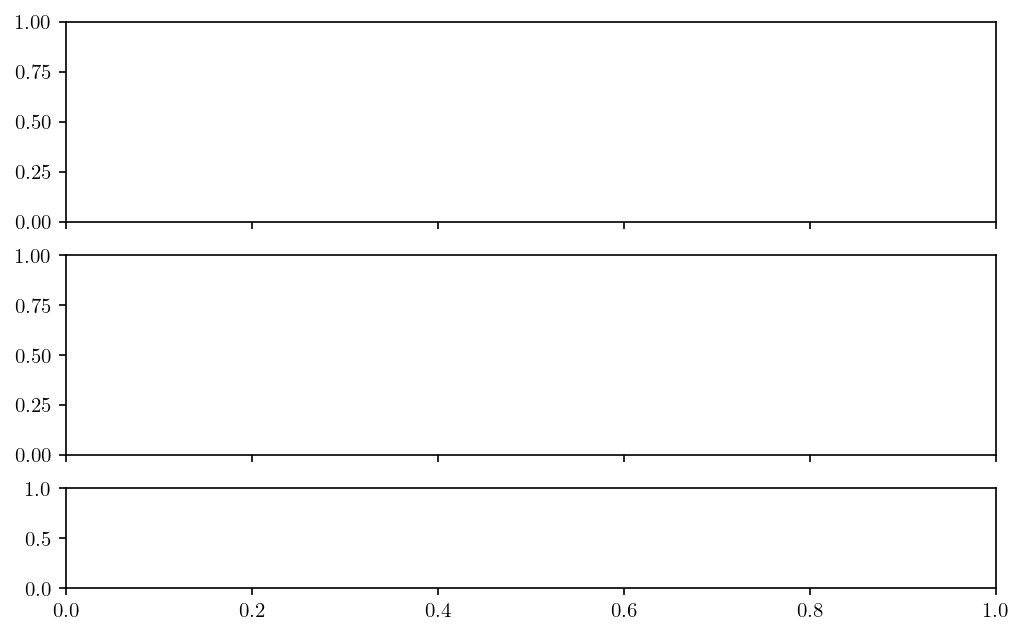

In [82]:
plot_compare_lily(final_shifts, final_shifts_err, days, 
    lily_data_file="34411_activity.csv",
    # save_as="latex/figures/HD34411_barycentric_rv_vs_lily.pdf",
    star_name="HD 34411"
)